<a href="https://colab.research.google.com/github/saiachanta2728/ML-LABS/blob/main/ML_Lab14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Machine Algorithm**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine

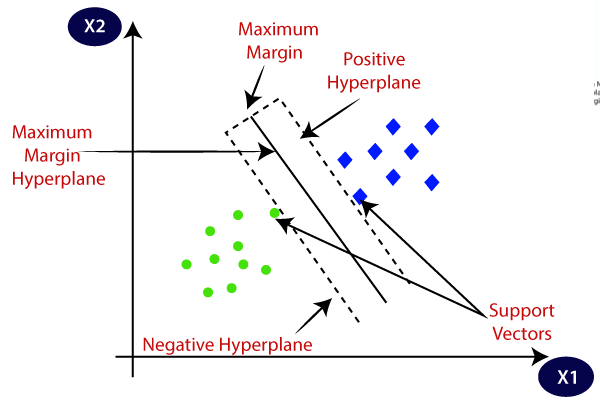

SVM algorithm can be used for Face detection, image classification, text categorization, etc.

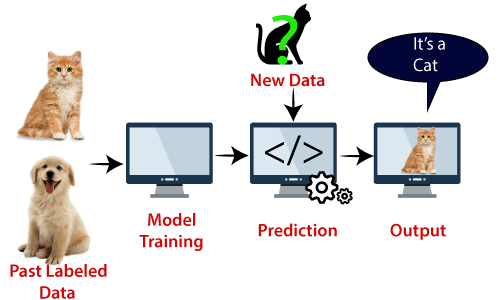

### **14. Write a program to Implement Support Vector Machines and Principle Component Analysis**

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Lab14.csv"  # Replace with the correct path to your dataset
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(dataset.head())

# Preprocess the data
# Assuming you have a categorical 'Gender' column that needs to be converted
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female': 0})

# Select features and target
X = dataset[['Gender', 'Age', 'EstimatedSalary']]
y = dataset['Purchased']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test_pca)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Confusion Matrix:
[[60  3]
 [13 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        63
           1       0.89      0.65      0.75        37

    accuracy                           0.84       100
   macro avg       0.86      0.80      0.82       100
weighted avg       0.85      0.84      0.83       100


Accuracy Score:
0.84


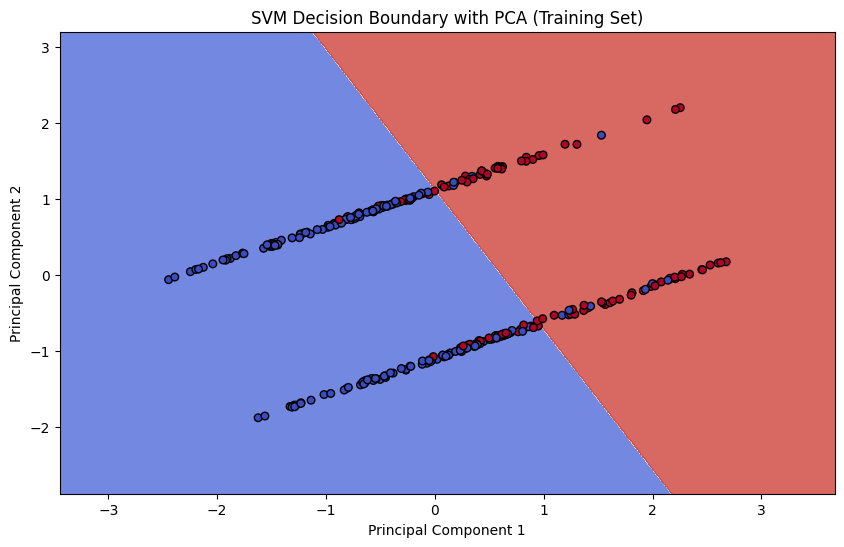

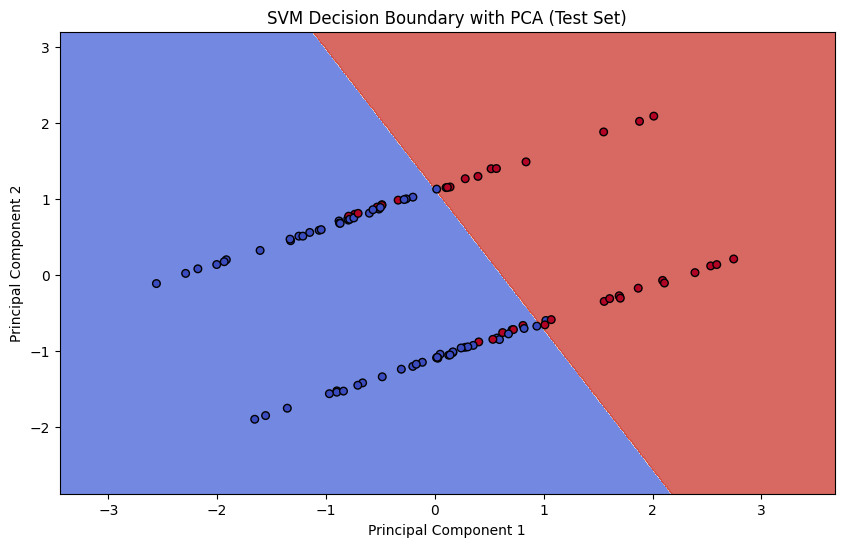

In [4]:
# Plotting the decision boundary and data points
# Create a meshgrid for plotting decision regions
h = 0.01  # Step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the class labels for the grid points
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the original data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary with PCA (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot the test data points and decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title('SVM Decision Boundary with PCA (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
